In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D((2,2),padding='valid'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
#model.add(Dropout(0.3))
#model.add(Dense(1024,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 64)         

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
testing_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = training_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Train/', 
                                                    target_size=(128,128), 
                                                    batch_size=64, 
                                                    class_mode='binary')

Found 2836 images belonging to 2 classes.


In [ ]:
test_set = testing_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test/', 
                                                target_size=(128,128), 
                                                batch_size=64,
                                                class_mode='binary')

Found 997 images belonging to 2 classes.


In [ ]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("/content/drive/My Drive/Deep Learning/CSV/Final_Best_Model1.h5",save_best_only=True)

In [ ]:
model.fit_generator(training_set, 
                         steps_per_epoch=2836/64, 
                         epochs=25, 
                         validation_data=test_set, 
                         validation_steps=997/64,
                        callbacks=[checkpoint_cb])

Epoch 1/25
18/44 [===========>..................] - ETA: 22s - loss: 0.6860 - accuracy: 0.5523

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


33/44 [=====================>........] - ETA: 9s - loss: 0.6815 - accuracy: 0.5503 

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


45/44 [==============================] - 156s 3s/step - loss: 0.6849 - accuracy: 0.5416 - val_loss: 0.6932 - val_accuracy: 0.5426
Epoch 2/25
45/44 [==============================] - 54s 1s/step - loss: 0.6827 - accuracy: 0.5684 - val_loss: 0.6798 - val_accuracy: 0.5707
Epoch 3/25
45/44 [==============================] - 55s 1s/step - loss: 0.6668 - accuracy: 0.5927 - val_loss: 0.6514 - val_accuracy: 0.6299
Epoch 4/25
45/44 [==============================] - 54s 1s/step - loss: 0.6552 - accuracy: 0.6037 - val_loss: 0.6448 - val_accuracy: 0.6409
Epoch 5/25
45/44 [==============================] - 53s 1s/step - loss: 0.6640 - accuracy: 0.5984 - val_loss: 0.6802 - val_accuracy: 0.6720
Epoch 6/25
45/44 [==============================] - 53s 1s/step - loss: 0.6637 - accuracy: 0.6118 - val_loss: 0.6622 - val_accuracy: 0.6439
Epoch 7/25
45/44 [==============================] - 54s 1s/step - loss: 0.6462 - accuracy: 0.6231 - val_loss: 0.6318 - val_accuracy: 0.6449
Epoch 8/25
45/44 [============

In [ ]:
del model

In [ ]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
model=keras.models.load_model('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/CSV/Final_Best_Model1.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/Test/', 
                                                target_size=(128,128) )

Found 997 images belonging to 2 classes.


In [ ]:
from os import listdir
fake=len(listdir('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/Test/Fake'))
real=len(listdir('/content/drive/My Drive/Deep Learning/FakeNewsFinalDataset/Test/Real'))
fake,real

(456, 541)

In [ ]:
import numpy as np
y_test_fake=np.zeros(fake,dtype=int)
y_test_real=np.ones(real,dtype=int)
y_test_fake,y_test_real

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
y_test=np.concatenate((y_test_fake,y_test_real))
y_test,y_test.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
y_pred_test=model.predict_classes(test_set)
y_pred_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
accuracy=accuracy_score(y_test,y_pred_test)
accuracy

0.5025075225677031

In [ ]:
print(classification_report(y_val,y_pred_val))

NameError: ignored

In [ ]:
#y_pred=model.predict('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test/Fake/5533.jpg')
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

[0]


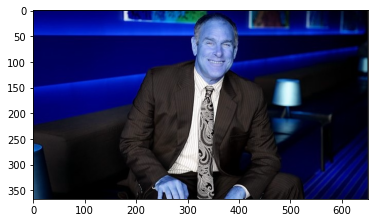

In [ ]:
image_path='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Train/Fake/10001.jpg'
import cv2
img=cv2.imread(image_path,3)
#gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

resized=cv2.resize(img,(64,64))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,64,64,3))
result=model.predict_classes(reshaped)
#print(result[0][0],result[0][1])        
    
#img = image.load_img(image_path, target_size=(100, 100,1),color_mode="grayscale")
plt.imshow(img)
#img = np.expand_dims(resized_img, axis=0)
#print(reshaped.shape)
#result=model.predict_classes(img)
print(result)

In [ ]:
import cv2
from os import listdir
lt_fake=[]
for image in listdir('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Validation/Fake'):
  img_path='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Validation/Fake/'+image
  img=cv2.imread(img_path,3)
  resized=cv2.resize(img,(128,128))
  normalized=resized/255.0
  reshaped=np.reshape(normalized,(1,128,128,3))
  result=model.predict(reshaped)
  if result[0][0]>0.55:
    lt_fake.append(1)
  else:
    lt_fake.append(0)
lt_fake.count(0),len(lt_fake)

(187, 293)

In [ ]:
lt_real=[]
for image in listdir('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Validation/Real'):
  img_path='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Validation/Real/'+image
  img=cv2.imread(img_path,3)
  resized=cv2.resize(img,(128,128))
  normalized=resized/255.0
  reshaped=np.reshape(normalized,(1,128,128,3))
  result=model.predict(reshaped)
  if result[0][0]>0.55:
    lt_real.append(1)
  else:
    lt_real.append(0)
lt_real.count(1),len(lt_real)

(161, 233)

In [ ]:
true_real=lt_real.count(1)
true_fake=lt_fake.count(0)
accuracy=(true_real+true_fake)/(len(lt_real)+len(lt_fake))
accuracy

In [ ]:
print(lt.count(1))#Fake(398) 0-->109   1-->287  Real(214) 0-->41     1-->173  [0:fake,1:real]
real=0
for i in lt_real:
  if i>0.55:
    real+=1
fake=0
for i in lt:
  if i<=0.55:
    fake+=1                   # 0.5=(173,233)  (154,345)<<                                  0.6=(137,233) (219,345)<<356>>
real,len(lt_real),fake,len(lt)# 0.5= (160,214)  (154,396)<<314>>  0.6=(127,214) (228,396)<<355>> 


0


(161, 233, 187, 293)

Fake
[[0]]


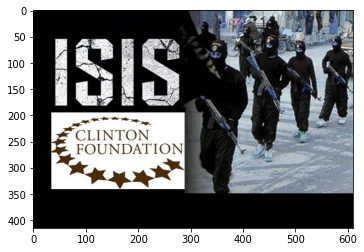

In [ ]:
import cv2
image_path='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Train/Fake/4910.jpg'
img=cv2.imread(image_path,3)

resized=cv2.resize(img,(128,128))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,128,128,3))
result=model.predict_classes(reshaped)
if result[0][0]==0:
  print('Fake')
else:
  print("Real")    
plt.imshow(img)
print(result)

In [ ]:
from IPython.display import Image

In [ ]:
from os import listdir
for imgName in listdir('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Train/Fake'):
  img='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test/Fake/'+imgName
display(Image(img))
img

'/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test/Fake/5533.jpg'

TypeError: ignored

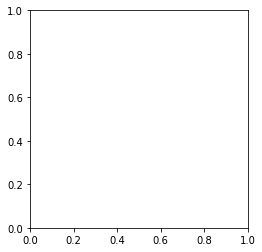

In [ ]:
import matplotlib.pyplot as plt
img='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test/Fake/6904.jpg'
plt.imshow(img)
plt.show()

In [ ]:
from os import listdir
test_real=len(listdir('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Validation/Real'))
test_fake=len(listdir('/content/drive/My Drive/Deep Learning/FakeNewsDataset/Validation/Fake'))
print(test_real,test_fake)
#train---> 2000,1875  -----> 1622, 576  ----> 1622, 1963  ----> 1622 844 ---> 1622 1325 ----> 1622 983 ---> 1622 1412 ---> 1622 1235 <<<DONE>>>
#test----> 750,646   ----> 542, 459   ----> 542, 459 <<<DONE>>>
#Validation----> 939, 892 ----> 214,164  -----> 729 , 872 ----> 214, 409 ----> __ 584

214 408


In [ ]:
from PIL import Image
import io



In [ ]:
byteImgIO = io.BytesIO()
byteImg = Image.open("/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test/Fake/6904.jpg")
byteImg.save(byteImgIO, "PNG")
byteImgIO.seek(0)
byteImg = byteImgIO.read()


In [ ]:
from keras.layers import Input,Dense,Flatten,Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [ ]:
Image_size=[224,224]
train_path='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Train'
test_path='/content/drive/My Drive/Deep Learning/FakeNewsDataset/Test'

In [ ]:
vgg=VGG16(input_shape=Image_size+[3],weights='imagenet',include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
X1=Flatten()(vgg.output)
X2=Dense(4096,activation='relu')(X1)
X2=Dropout(0.5)(X2)
X3=Dense(2048,activation='relu')(X2)
X3=Dropout(0.2)(X3)
X4=Dense(1024,activation='relu')(X3)
X5=Dense(512,activation='relu')(X4)
X5=Dropout(0.2)(X5)
X6=Dense(128,activation='relu')(X5)
prediction=Dense(2,activation='softmax')(X6)

In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,batch_size=32,target_size=(224,224),class_mode='categorical')

Found 2855 images belonging to 2 classes.
Found 997 images belonging to 2 classes.


In [ ]:
history=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=2855/32,validation_steps=997/32)

Epoch 1/5
 5/89 [>.............................] - ETA: 47s - loss: 0.4791 - accuracy: 0.7375

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23/89 [======>.......................] - ETA: 43s - loss: 0.4888 - accuracy: 0.7310

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


90/89 [==============================] - 77s 859ms/step - loss: 0.5313 - accuracy: 0.7275 - val_loss: 0.6552 - val_accuracy: 0.6830
Epoch 2/5
90/89 [==============================] - 78s 863ms/step - loss: 0.5175 - accuracy: 0.7489 - val_loss: 0.6852 - val_accuracy: 0.6750
Epoch 3/5
90/89 [==============================] - 77s 859ms/step - loss: 0.5095 - accuracy: 0.7538 - val_loss: 0.6224 - val_accuracy: 0.6720
Epoch 4/5
90/89 [==============================] - 77s 851ms/step - loss: 0.4953 - accuracy: 0.7751 - val_loss: 0.6769 - val_accuracy: 0.6510
Epoch 5/5
90/89 [==============================] - 77s 858ms/step - loss: 0.4764 - accuracy: 0.7723 - val_loss: 0.6291 - val_accuracy: 0.6780
